# OUTLIERS

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [118]:
df = pd.read_csv('Capston_Missing_Values.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [119]:
df.head()

,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,cons_comb,co2_emission6,Upholstery_Type
0,Audi A1,Sedans,15770,VAT deductible,56013.000,66.000,Used,Automatic,1422.000,Benzine,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Voice...","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.000,No,3.000,99.000,Cloth
1,Audi A1,Sedans,14500,Price negotiable,80000.000,141.000,Used,Automatic,1798.000,other_fuel,"Air conditioning,Automatic climate control,Hil...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats', 'Sport suspens...","['ABS', 'Central door lock', 'Central door loc...",7.000,2.000,No,5.000,129.000,Cloth
2,Audi A1,Sedans,14640,VAT deductible,83450.000,85.000,Used,Automatic,1598.000,Benzine,"Air conditioning,Cruise control,Electrical sid...","['MP3', 'On-board computer']","['Alloy wheels', 'Voice Control']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.000,No,3.000,99.000,Cloth
3,Audi A1,Sedans,14500,VAT deductible,73000.000,66.000,Used,Automatic,1422.000,Benzine,"Air suspension,Armrest,Auxiliary heating,Elect...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport seats', 'Voice Control']","['ABS', 'Alarm system', 'Central door lock wit...",6.000,3.000,No,3.000,99.000,Cloth
4,Audi A1,Sedans,16790,VAT deductible,16200.000,66.000,Used,Automatic,1422.000,Benzine,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.000,No,4.000,109.000,Cloth


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  15919 non-null  object 
 4   km                   15919 non-null  float64
 5   hp                   15919 non-null  float64
 6   type                 15919 non-null  object 
 7   gearing_type         15919 non-null  object 
 8   displacement         15919 non-null  float64
 9   fuel                 15919 non-null  object 
 10  comfort&convenience  15919 non-null  object 
 11  entertainment&media  15919 non-null  object 
 12  extras               15919 non-null  object 
 13  safety&security      15919 non-null  object 
 14  gears                11207 non-null  float64
 15  age_of_car           15919 non-null 

In [121]:
df.gears.fillna('-', inplace  = True)

In [122]:
df.gears.replace([1,2,3,4,9,50, '-'], np.nan, inplace = True)

In [123]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["gearing_type"].unique()):
            cond1 = df["make_model"]==group1
            cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
            cond3 = (df["make_model"]==group1) & (df["body_type"]==group2) & (df["gearing_type"]==group3)
            mode1 = list(df[cond1]["gears"].mode())
            mode2 = list(df[cond2]["gears"].mode())
            mode3 = list(df[cond3]["gears"].mode())
            if mode3 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond3]["gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond2]["gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond1]["gears"].mode()[0])
            else:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df["gears"].mode()[0])

### price

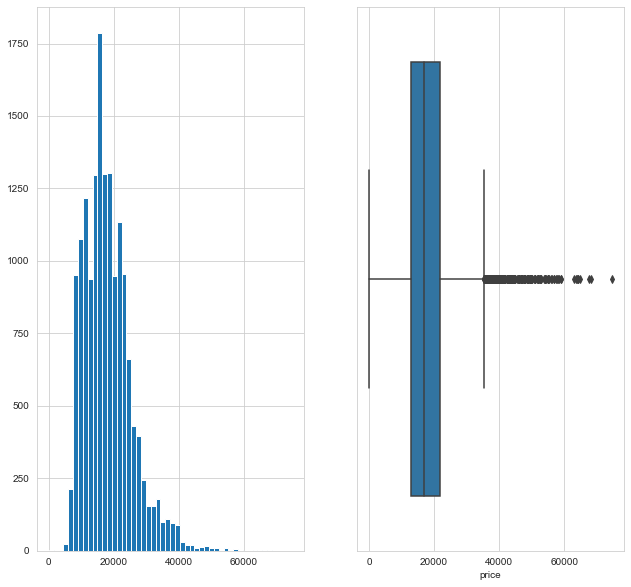

In [124]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.price, bins = 50)

plt.subplot(142)
sns.boxplot(df.price);

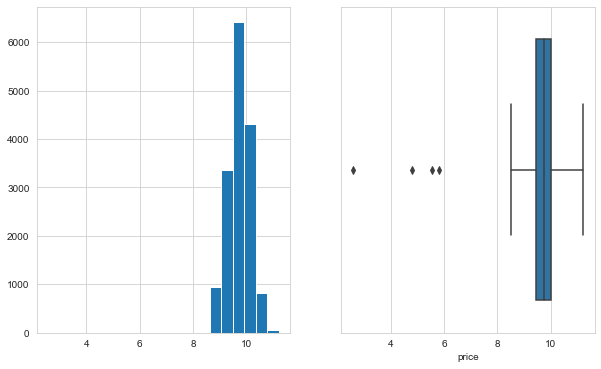

In [125]:
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.hist(np.log(df.price), bins = 20)

plt.subplot(122)
sns.boxplot(np.log(df.price), whis = 2.3)

plt.show()

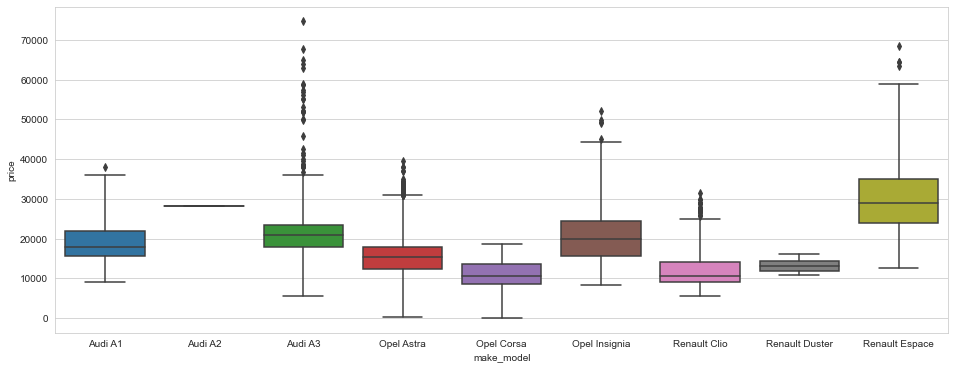

In [126]:
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'make_model', y = 'price', data = df, whis = 2.3);

In [127]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [128]:
df.price.sort_values().tail(5)

15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, dtype: int64

In [129]:
df.drop(index = [8594, 8828, 6066, 8829], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [130]:
df.shape

(15915, 20)

### km

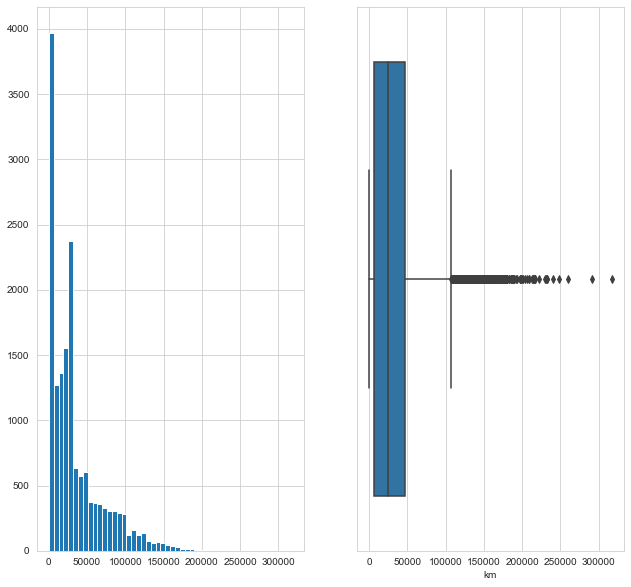

In [131]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
sns.boxplot(df.km);

### hp

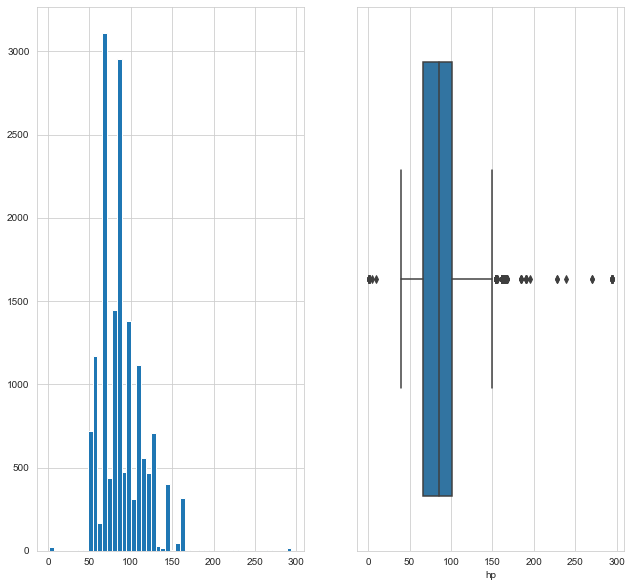

In [132]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.hp, bins = 50)

plt.subplot(142)
sns.boxplot(df.hp);

In [133]:
df.hp.sort_values().head(40)

7015     1.000
9284     1.000
9285     1.000
9286     1.000
9288     1.000
9295     1.000
6945     1.000
7013     1.000
6034     1.000
9283     1.000
9281     1.000
7018     1.000
6005     1.000
10464    1.000
10575    1.000
10576    1.000
10606    1.000
15151    1.000
15152    1.000
7017     1.000
13881    4.000
3913     9.000
13755   40.000
8853    40.000
8407    44.000
10157   51.000
10158   51.000
10159   51.000
10160   51.000
10164   51.000
10165   51.000
10166   51.000
10168   51.000
9230    51.000
10169   51.000
10170   51.000
10172   51.000
10173   51.000
10174   51.000
10175   51.000
Name: hp, dtype: float64

In [134]:
df.hp.sort_values().tail(10)

3648   294.000
3600   294.000
3610   294.000
3606   294.000
3605   294.000
3649   294.000
3604   294.000
3603   294.000
3599   294.000
3592   294.000
Name: hp, dtype: float64

In [135]:
df.hp.loc[df.hp < 40] = np.nan

In [136]:
df.hp.isnull().sum()

22

In [137]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [138]:
fill(df, 'make_model', 'body_type', 'hp', 'mode')

Number of NaN :  0
------------------
85.000     2544
66.000     2121
81.000     1404
100.000    1311
110.000    1116
70.000      890
125.000     711
51.000      702
55.000      570
118.000     552
92.000      466
121.000     395
147.000     380
77.000      353
56.000      315
54.000      276
103.000     259
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
120.000       8
104.000       8
112.000       7
191.000       7
155.000       6
117.000       6
184.000       5
65.000        4
76.000        4
90.000        4
98.000        3
168.000       3
149.000       3
80.000        3
93.000        3
143.000       2
86.000        2
140.000       2
150.000       2
228.000       2
270.000       2
53

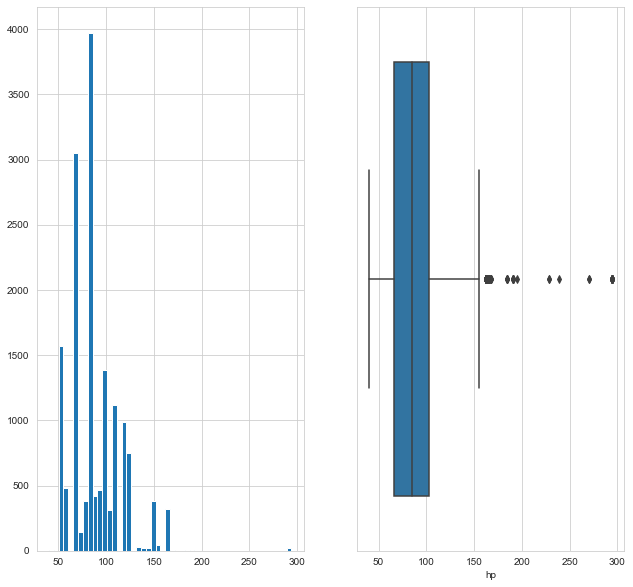

In [139]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.hp, bins = 50)

plt.subplot(142)
sns.boxplot(df.hp);

In [140]:
df.hp.sort_values().head(10)

13755   40.000
8853    40.000
8407    44.000
9372    51.000
10283   51.000
9157    51.000
10284   51.000
10285   51.000
10286   51.000
10287   51.000
Name: hp, dtype: float64

### displacement

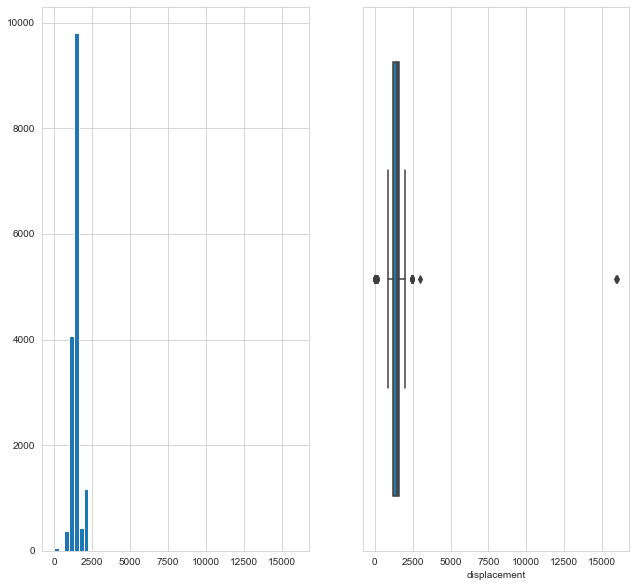

In [141]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.displacement, bins = 50)

plt.subplot(142)
sns.boxplot(df.displacement);

In [142]:
df.sort_values(by = ['displacement'], ascending = True).displacement.head(50)

14320     1.000
12764     1.000
12765     1.000
12777     1.000
12779     1.000
12782     1.000
12786     1.000
12792     1.000
12794     1.000
14311     1.000
14310     1.000
12796     1.000
12811     1.000
12819     1.000
12831     1.000
12844     1.000
13900     1.000
12845     1.000
14321     1.000
14315     1.000
12746     1.000
14324     1.000
12550     1.000
12497     1.000
12495     1.000
12480     1.000
14322     1.000
14323     1.000
12666     1.000
14280     1.000
12463     1.000
14318     1.000
14317     1.000
12600     1.000
14316     1.000
12469     1.000
10555     2.000
14194     2.000
13908    54.000
10190   122.000
7811    139.000
7810    139.000
7809    139.000
7808    139.000
8127    140.000
15575   160.000
15574   160.000
15573   160.000
15572   160.000
15571   160.000
Name: displacement, dtype: float64

In [143]:
df.sort_values(by = ['displacement'], ascending = True).displacement.tail()

3592     2480.000
3602     2480.000
10767    2967.000
7168    15898.000
10928   16000.000
Name: displacement, dtype: float64

In [144]:
outlier_bool_list = df.displacement.isin([1.0, 2.0, 54.0, 122.0, 139.0, 140.0, 160.0, 16000.0, 15898.0])

In [145]:
df.loc[outlier_bool_list, 'displacement'] = np.nan

In [146]:
fill(df, 'make_model', 'body_type', 'displacement', 'mode')

Number of NaN :  0
------------------
1598.000    5074
999.000     2464
1398.000    1334
1399.000     772
1229.000     677
1956.000     670
1461.000     667
1490.000     559
1422.000     467
1197.000     387
898.000      351
1395.000     321
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
998.000       72
1357.000      53
1500.000      50
2000.000      46
1000.000      40
1998.000      25
2480.000      20
1200.000      18
1984.000      18
1397.000      11
899.000       11
1499.000       5
929.000        5
900.000        4
997.000        4
1596.000       4
1396.000       3
1199.000       3
1599.000       3
995.000        2
1300.000       2
1495.000       2
1608.000       2
1589.000       2
890.000        1
1533.000       1
1100.000       1
1333.000       1
1995.000       1
1580.000       1
1198.000       1
1496.000       1
1856.000       1
1896.000       1
1584.000  

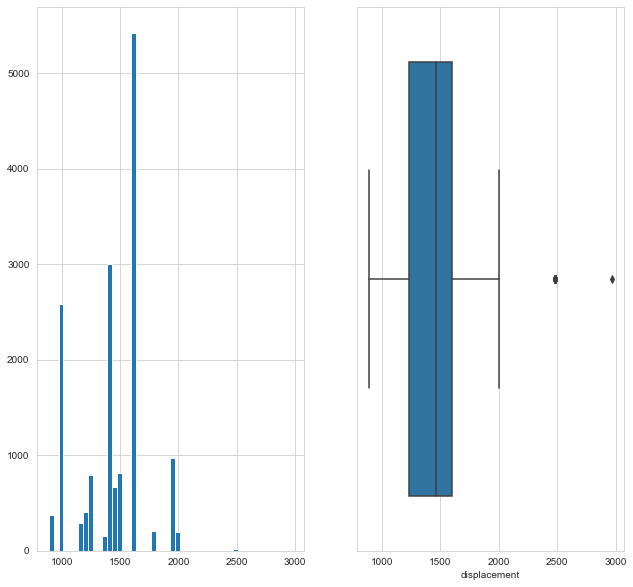

In [147]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.displacement, bins = 50)

plt.subplot(142)
sns.boxplot(df.displacement);

### gears

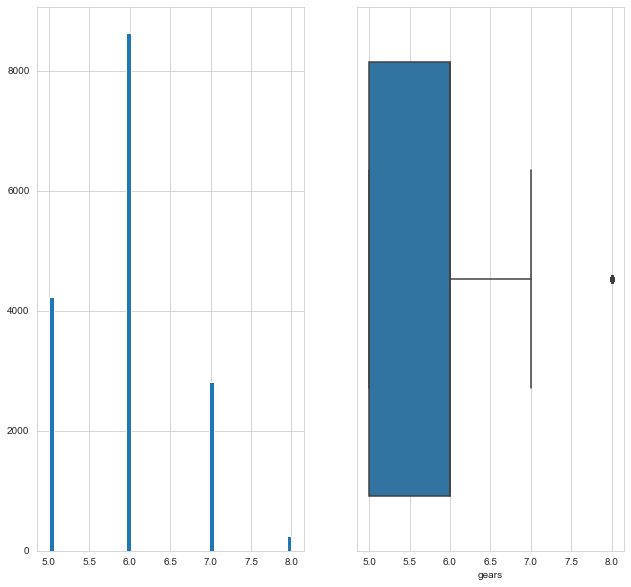

In [148]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.gears, bins = 50)

plt.subplot(142)
sns.boxplot(df.gears);

### age_of_car

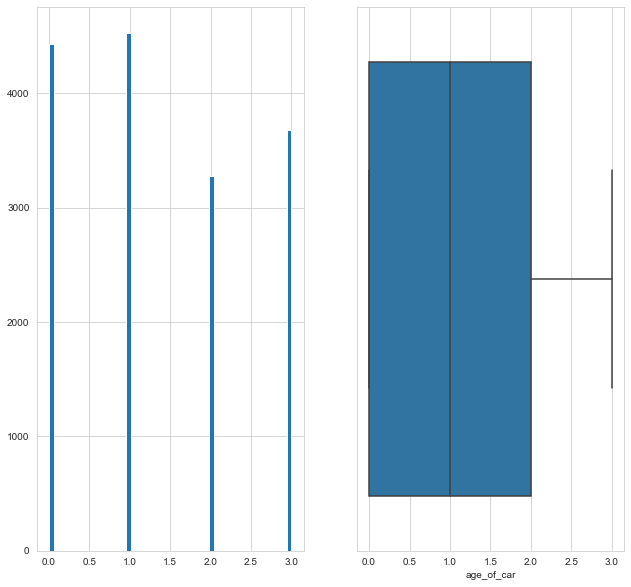

In [149]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.age_of_car, bins = 50)

plt.subplot(142)
sns.boxplot(df.age_of_car);

### cons_comb

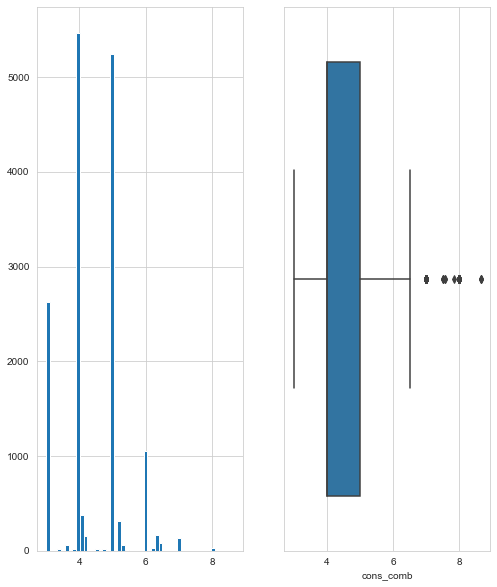

In [150]:
plt.figure(figsize=(17,10))
plt.subplot(141)
plt.hist(df.cons_comb, bins = 50)

plt.subplot(142)
sns.boxplot(df.cons_comb);

Using our domain knowledge we can conclude that min value of 3 and max value of 13 are normal

### co2_emission6

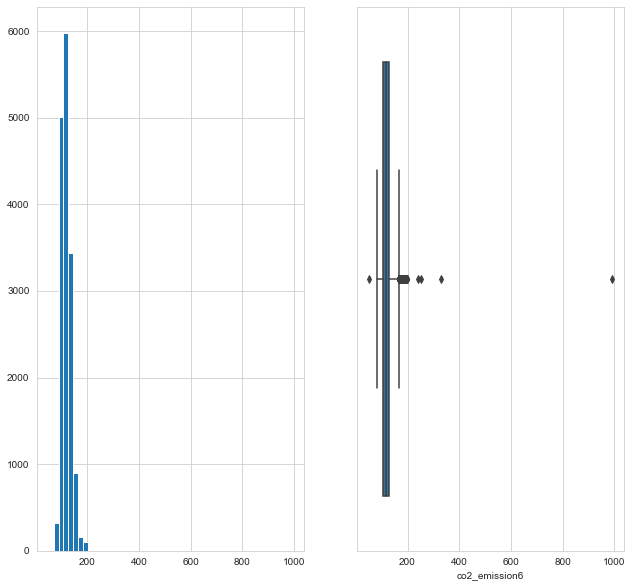

In [151]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.co2_emission6, bins = 50)

plt.subplot(142)
sns.boxplot(df.co2_emission6);

In [152]:
df.sort_values(by = ['co2_emission6'], ascending = True).co2_emission6.head(20)

9794    51.000
7856    80.000
13664   82.000
8565    82.000
13702   82.000
13575   82.000
8584    82.000
14146   82.000
13959   82.000
14147   82.000
14193   82.000
13717   82.000
8868    82.000
8870    82.000
8900    82.000
8907    82.000
13736   82.000
8908    82.000
8474    82.000
13413   82.000
Name: co2_emission6, dtype: float64

In [153]:
df.sort_values(by = ['co2_emission6'], ascending = True).co2_emission6.tail(20)

3609    189.000
3598    189.000
10503   189.000
10544   190.000
15639   191.000
15640   191.000
15677   193.000
3590    194.000
15842   194.000
10511   194.000
12526   197.000
10785   197.000
12549   197.000
12418   197.000
12525   199.000
12050   199.000
10767   239.000
10509   253.000
535     331.000
4556    990.000
Name: co2_emission6, dtype: float64

In [154]:
outlier_bool_list = df.co2_emission6.isin([51.00, 239.00,253.00, 331.00,990.00])

In [155]:
df.loc[outlier_bool_list, 'co2_emission6'] = np.nan

In [156]:
fill(df, 'make_model', 'body_type', 'co2_emission6', 'median')

Number of NaN :  0
------------------
120.000    849
119.000    700
102.000    689
104.000    680
106.000    620
99.000     545
97.000     538
124.000    516
140.000    515
103.000    445
107.000    417
113.000    395
114.000    395
108.000    362
125.000    340
133.000    332
128.000    330
118.000    314
130.000    299
110.000    289
117.000    285
126.000    282
85.000     275
127.000    257
111.000    237
109.000    234
139.000    224
129.000    213
135.000    202
105.000    202
92.000     198
123.000    188
150.000    174
143.000    171
112.000    171
95.000     161
116.000    158
141.000    156
98.000     151
136.000    145
137.000    133
134.000    130
145.000    126
149.000    117
153.000    113
147.000    109
101.000    104
132.000    100
115.000     86
122.000     83
121.000     82
138.000     77
93.000      66
131.000     61
142.000     58
168.000     58
90.000      54
148.000     48
154.000     40
144.000     40
94.000      37
146.000     36
100.000     36
151.000     34
18

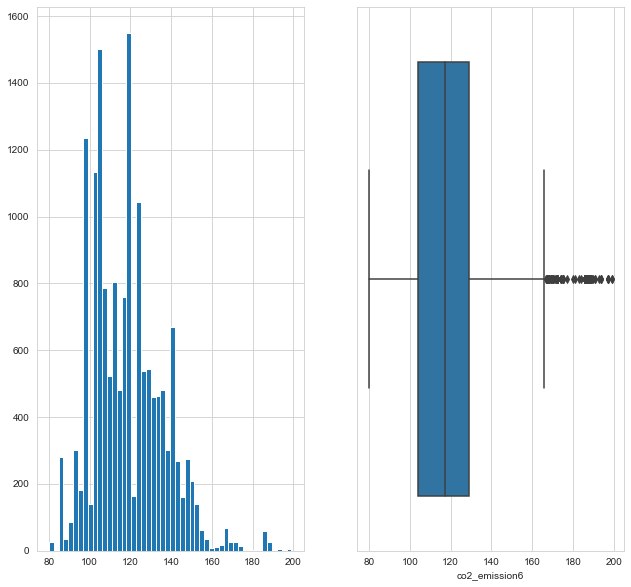

In [157]:
plt.figure(figsize=(22,10))
plt.subplot(141)
plt.hist(df.co2_emission6, bins = 50)

plt.subplot(142)
sns.boxplot(df.co2_emission6);

## Final Step

In [158]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
hp,66.000,141.000,85.000
type,Used,Used,Used
gearing_type,Automatic,Automatic,Automatic
displacement,1422.000,1798.000,1598.000
fuel,Benzine,other_fuel,Benzine


In [159]:
numeric_col = 'price,km,hp,displacement,age_of_car,cons_comb,co2_emission6'.split(',')

In [160]:
df_num = df[numeric_col]
df_num

,price,km,hp,displacement,age_of_car,cons_comb,co2_emission6
0,15770,56013.000,66.000,1422.000,3.000,3.000,99.000
1,14500,80000.000,141.000,1798.000,2.000,5.000,129.000
2,14640,83450.000,85.000,1598.000,3.000,3.000,99.000
3,14500,73000.000,66.000,1422.000,3.000,3.000,99.000
4,16790,16200.000,66.000,1422.000,3.000,4.000,109.000
...,...,...,...,...,...,...,...
15910,39950,29986.000,147.000,1997.000,0.000,5.000,139.000
15911,39885,9900.000,165.000,1798.000,0.000,7.000,168.000
15912,39875,15.000,146.000,1997.000,0.000,5.000,139.000
15913,39700,10.000,147.000,1997.000,0.000,5.000,139.000


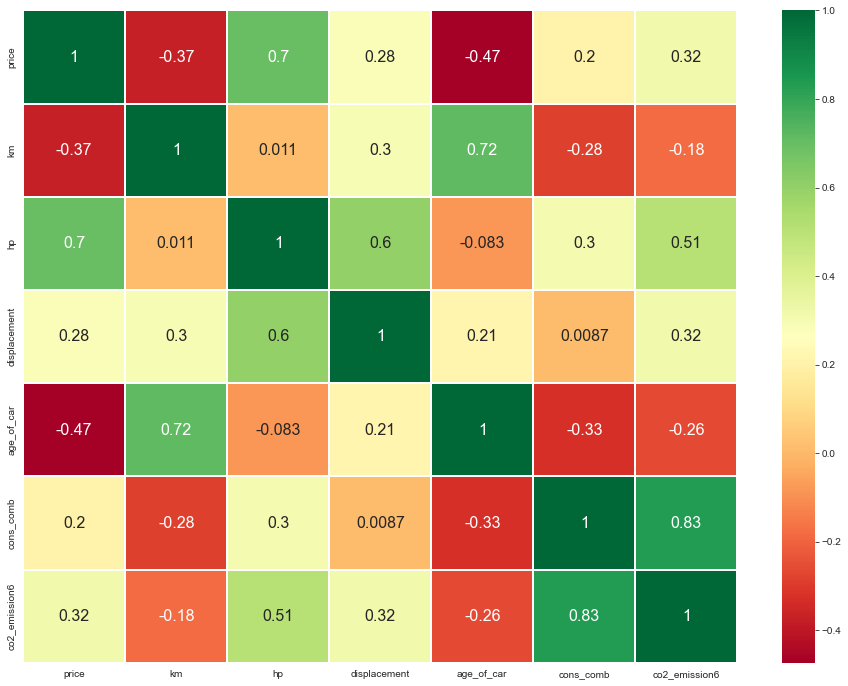

In [161]:
plt.figure(figsize = (16, 12))
sns.heatmap(df_num.corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2, annot_kws = {'size' : 16});

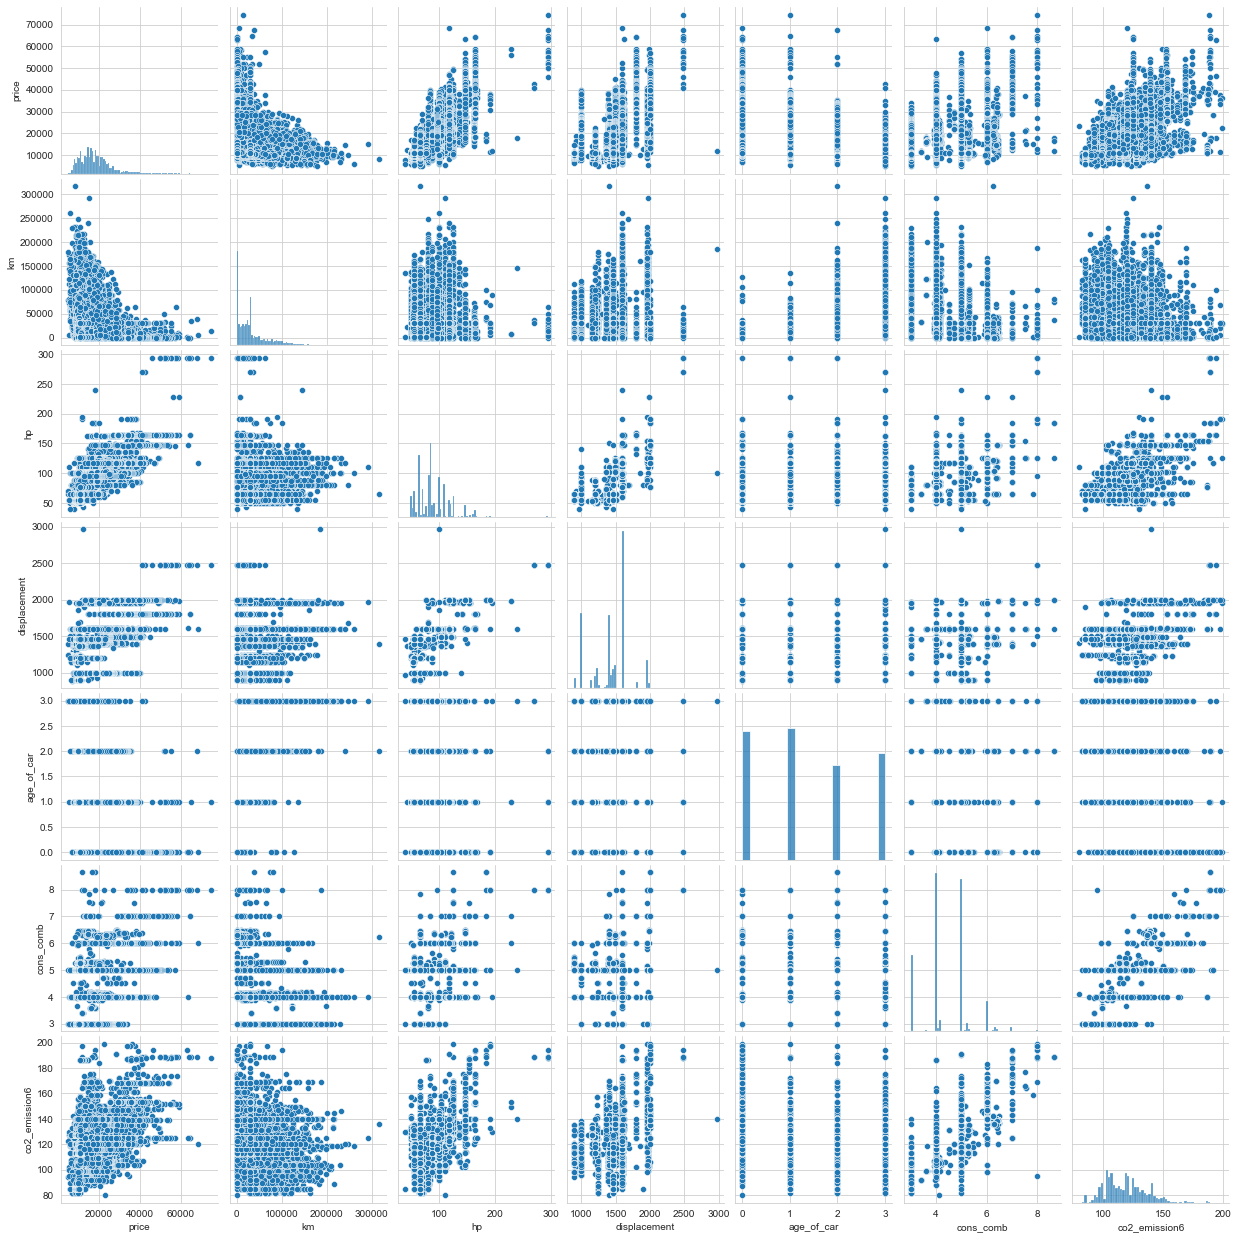

In [162]:
sns.pairplot(df_num, size = 2.5); 

### Dummy Operation

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   hp                   15915 non-null  float64
 6   type                 15915 non-null  object 
 7   gearing_type         15915 non-null  object 
 8   displacement         15915 non-null  float64
 9   fuel                 15915 non-null  object 
 10  comfort&convenience  15915 non-null  object 
 11  entertainment&media  15915 non-null  object 
 12  extras               15915 non-null  object 
 13  safety&security      15915 non-null  object 
 14  gears                15915 non-null  float64
 15  age_of_car           15915 non-null 

In [164]:
df.shape

(15915, 20)

In [165]:
df.to_csv('final_scout_not_get_dummy.csv', index = False)

In [166]:
df = df.join(df['comfort&convenience'].str.get_dummies(sep = ',').add_prefix('cc_'))
df = df.join(df['entertainment&media'].str.get_dummies(sep = ',').add_prefix('em_'))
df = df.join(df['extras'].str.get_dummies(sep = ',').add_prefix('ex_'))
df = df.join(df['safety&security'].str.get_dummies(sep = ',').add_prefix('ss_'))

In [167]:
df.drop(['comfort&convenience', 'entertainment&media', 'extras', 'safety&security'], axis = 1, inplace = True)

In [168]:
df.shape

(15915, 220)

In [169]:
df_final = pd.get_dummies(df, drop_first = True)  #for other categorical columns

In [170]:
df_final.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
hp,66.000,141.000,85.000,66.000,66.000
displacement,1422.000,1798.000,1598.000,1422.000,1422.000
gears,7.000,7.000,7.000,6.000,7.000
age_of_car,3.000,2.000,3.000,3.000,3.000
cons_comb,3.000,5.000,3.000,3.000,4.000
co2_emission6,99.000,129.000,99.000,99.000,109.000
cc_Air conditioning,1.000,1.000,1.000,0.000,1.000
cc_Air suspension,0.000,0.000,0.000,1.000,0.000


In [171]:
df_final.drop(["ss_['LED Headlights'","ss_['Isofix'","ss_['Immobilizer'","ss_['Fog lights'","ss_['Electronic stability control'","ss_['Driver-side airbag'","ss_['Central door lock'","ss_['Central door lock with remote control'","ss_['Alarm system'","ss_['ABS'","ss_ 'Traffic sign recognition'","ss_ 'Traction control'","ss_ 'Tire pressure monitoring system'","ss_ 'Side airbag'","ss_ 'Rear airbag'","ss_ 'Power steering'","ss_ 'Passenger-side airbag'","ss_ 'Lane departure warning system'","ss_ 'LED Headlights'","ss_ 'LED Daytime Running Lights'","ss_ 'Isofix'","ss_ 'Immobilizer'","ss_ 'Fog lights'","ss_ 'Electronic stability control'","ss_ 'Driver-side airbag'","ss_ 'Central door lock with remote control'","ex_['Voice Control'","ex_['Trailer hitch'","ex_['Touch screen'","ex_['Sport suspension'","ex_['Sport seats'","ex_['Sport package'","ex_['Ski bag'","ex_['Shift paddles'","ex_['Roof rack'","ex_['Catalytic Converter'","ex_['Cab or rented Car'","ex_['Alloy wheels'","ex_ 'Voice Control'","ex_ 'Tuned car'","ex_ 'Trailer hitch'","ex_ 'Touch screen'","ex_ 'Sport suspension'","ex_ 'Sport seats'","ex_ 'Sport package'","ex_ 'Sliding door'","ex_ 'Ski bag'","ex_ 'Shift paddles'","ex_ 'Roof rack'","ex_ 'Handicapped enabled'","ex_ 'Catalytic Converter'","ex_ 'Cab or rented Car'","em_['Sound system'","em_['Radio'","em_['On-board computer'","em_['MP3'","em_['Hands-free equipment'","em_['Digital radio'","em_['CD player'","em_['Bluetooth']","em_ 'Television'","em_ 'Sound system'","em_ 'Radio'","em_ 'On-board computer'","em_ 'MP3'","em_ 'Hands-free equipment'","em_ 'Digital radio'","em_ 'CD player'"],axis=1,inplace=True)

In [172]:
#  ["ss_['LED Headlights'","ss_['Isofix'","ss_['Immobilizer'","ss_['Fog lights'","ss_['Electronic stability control'","ss_['Driver-side airbag'","ss_['Central door lock'","ss_['Central door lock with remote control'","ss_['Alarm system'","ss_['ABS'","ss_ 'Traffic sign recognition'","ss_ 'Traction control'","ss_ 'Tire pressure monitoring system'","ss_ 'Side airbag'","ss_ 'Rear airbag'","ss_ 'Power steering'","ss_ 'Passenger-side airbag'","ss_ 'Lane departure warning system'","ss_ 'LED Headlights'","ss_ 'LED Daytime Running Lights'","ss_ 'Isofix'","ss_ 'Immobilizer'","ss_ 'Fog lights'","ss_ 'Electronic stability control'","ss_ 'Driver-side airbag'","ss_ 'Central door lock with remote control'","ex_['Voice Control'","ex_['Trailer hitch'","ex_['Touch screen'","ex_['Sport suspension'","ex_['Sport seats'","ex_['Sport package'","ex_['Ski bag'","ex_['Shift paddles'","ex_['Roof rack'","ex_['Catalytic Converter'","ex_['Cab or rented Car'","ex_['Alloy wheels'","ex_ 'Voice Control'","ex_ 'Tuned car'","ex_ 'Trailer hitch'","ex_ 'Touch screen'","ex_ 'Sport suspension'","ex_ 'Sport seats'","ex_ 'Sport package'","ex_ 'Sliding door'","ex_ 'Ski bag'","ex_ 'Shift paddles'","ex_ 'Roof rack'","ex_ 'Handicapped enabled'","ex_ 'Catalytic Converter'","ex_ 'Cab or rented Car'","em_['Sound system'","em_['Radio'","em_['On-board computer'","em_['MP3'","em_['Hands-free equipment'","em_['Digital radio'","em_['CD player'","em_['Bluetooth']","em_ 'Television'","em_ 'Sound system'","em_ 'Radio'","em_ 'On-board computer'","em_ 'MP3'","em_ 'Hands-free equipment'","em_ 'Digital radio'","em_ 'CD player'"]

In [173]:
df_final.to_csv('final_scout_dummy.csv', index  = False)

In [177]:
df_final.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
hp,66.000,141.000,85.000,66.000,66.000
displacement,1422.000,1798.000,1598.000,1422.000,1422.000
gears,7.000,7.000,7.000,6.000,7.000
age_of_car,3.000,2.000,3.000,3.000,3.000
cons_comb,3.000,5.000,3.000,3.000,4.000
co2_emission6,99.000,129.000,99.000,99.000,109.000
cc_Air conditioning,1.000,1.000,1.000,0.000,1.000
cc_Air suspension,0.000,0.000,0.000,1.000,0.000


In [175]:
df_final.shape

(15915, 171)